In [2]:
import numpy as np # conda install numpy -y
import pandas as pd # conda install pandas -y
import matplotlib.pyplot as plt # conda install matplotlib -y
from skimage.io import imread # conda install scikit-image -y
import os

## Exploring the dataset

### Load dataset

In [3]:
image_path = './pets_database/'

# This dataset is a reduced version of STL10 dataset
df = pd.read_csv('pets_database.csv')
display(df.head())

,filename,label
0,image_000001.jpg,dog
1,image_000002.jpg,cat
2,image_000003.jpg,dog
3,image_000004.jpg,dog
4,image_000005.jpg,dog


### Visualize images

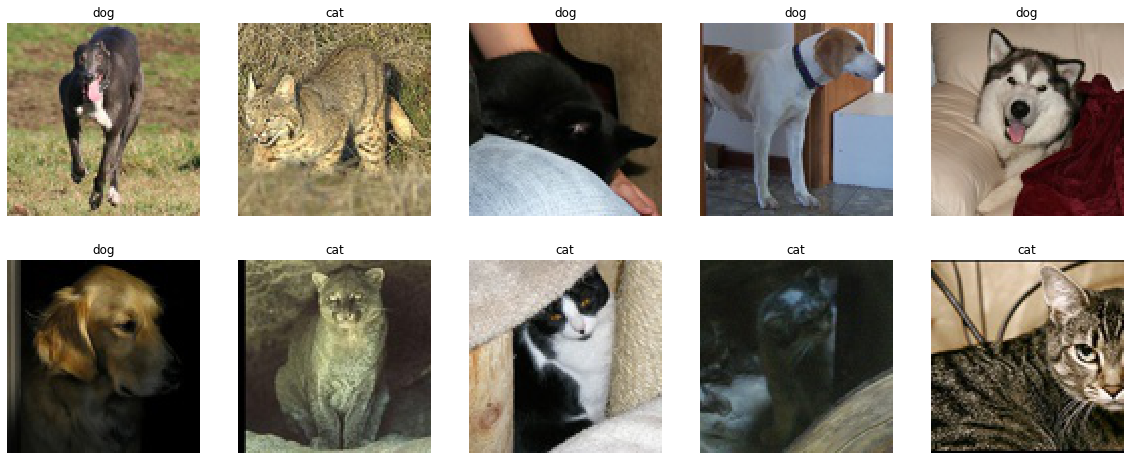

In [4]:
# visualizing 10 first images and its classes

fig = plt.figure(figsize=(20, 8))
for i in range(10):
    filename, label = df.loc[i].filename, df.loc[i].label
    im = imread(os.path.join(image_path, filename))
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(label)
    ax.axis('off')
    ax.imshow(im)
plt.show()

### Distribution of classes

Information about classes:
[['cat' '100']
 ['dog' '100']]


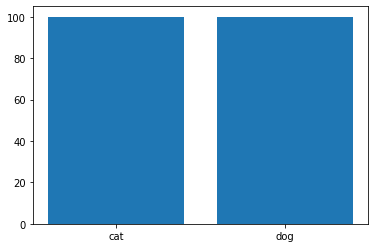

In [5]:
print('Information about classes:')

classes = np.unique(df.label)
description = np.array([(c, np.sum(df.label == c)) for c in classes])
print(description)

plt.bar(description[:,0], description[:,1].astype(np.int))
plt.show()

## Classification using only raw pixels

In [6]:
from sklearn.model_selection import train_test_split

In [10]:
# Convert images as vector to create dataset
features = [imread(os.path.join(image_path, filename)).flatten() for filename in df.filename]
features = np.array(features)
y = df.label.values

features.shape, 96*96*3, y.shape

((200, 27648), 27648, (200,))

In [16]:
seed = 23

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=seed)

print('Training set shape: {}'.format(X_train.shape))
print('Test set shape: {}'.format(X_test.shape))

print(y_train[:5])

Training set shape: (160, 27648)
Test set shape: (40, 27648)
['cat' 'cat' 'cat' 'cat' 'cat']


Model accuracy in training set: 0.9375


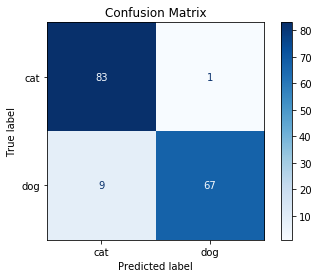

Model accuracy in test set: 0.55


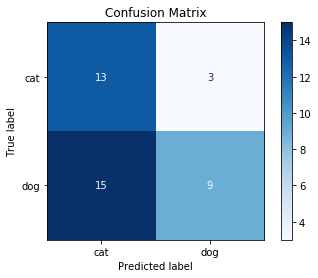

In [17]:
# SVM model (support vector machine)
# RF model (random forest)
# DT model (decision tree)
# NN model (neural network)
# DNN model (deep neural network)
# CNN model (convolutional neural network)

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from joblib import dump, load

model = svm.SVC() # You can set the parameters
model.fit(X_train, y_train) # Fitting the model

dump(model, 'svm_model_pixels.joblib') # saving model
model = load('svm_model_pixels.joblib') # loading model

y_pred = model.predict(X_train) # Prediction on test set

accuracy_train = accuracy_score(y_train, y_pred)

print('Model accuracy in training set: {}'.format(accuracy_train))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_train, y_train,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()

y_pred = model.predict(X_test) # Prediction on test set

accuracy_test = accuracy_score(y_test, y_pred)
print('Model accuracy in test set: {}'.format(accuracy_test))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_test, y_test,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()

## Classification using histogram as feature

In [20]:
from skimage import exposure, img_as_float # for histogram

nbins = 256
features = []
for filename in df.filename:
    im = imread(os.path.join(image_path, filename))
    im = img_as_float(im)
    features.append(np.stack([exposure.histogram(im[:,:,0])[0],
                             exposure.histogram(im[:,:,1])[0],
                             exposure.histogram(im[:,:,2])[0]]).flatten())

features = np.array(features)
features.shape, 256*3

((200, 768), 768)

In [21]:
seed = 23

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=seed)

print('Training set shape: {}'.format(X_train.shape))
print('Test set shape: {}'.format(X_test.shape))     

Training set shape: (160, 768)
Test set shape: (40, 768)


In [ ]:
# Feature selection
# supervised and unsupervised
# Weka (java)

# Curse of dimensionality (large set of features)

Model accuracy in training set: 0.83125


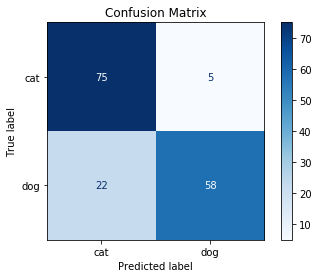

Model accuracy in test set: 0.6


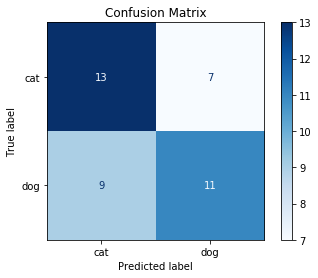

In [22]:
# SVM model
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from joblib import dump, load

model = svm.SVC() # You can set the parameters
model.fit(X_train, y_train) # Fitting the model

# saving trained model

dump(model, 'svm_model_histogram.joblib')
model = load('svm_model_histogram.joblib')

y_pred = model.predict(X_train) # Prediction on test set

accuracy_train = accuracy_score(y_train, y_pred)

print('Model accuracy in training set: {}'.format(accuracy_train))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_train, y_train,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()

y_pred = model.predict(X_test) # Prediction on test set

accuracy_test = accuracy_score(y_test, y_pred)
print('Model accuracy in test set: {}'.format(accuracy_test))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_test, y_test,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()

